In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/most-sold-books-in-the-world/Books.csv')

# Display the first few rows of the dataset
df.head()


,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction"
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga


In [3]:
df.shape

(264, 6)

In [4]:
# Display the data types of each column
df.dtypes


Book                 object
Author(s)            object
Original language    object
First published      object
Approximate sales    object
Genre                object
dtype: object

In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values in each column
missing_values


Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64

**How is the distribution of sales across the books?**

In [6]:
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.histogram(df, x='Approximate sales', nbins=20, marginal='rug', title='Distribution of Sales Across Books')
fig.update_layout(xaxis_title='Approximate Sales', yaxis_title='Frequency', height=1000, width=800)
fig.show()

**What is the distribution of books across different genres?**

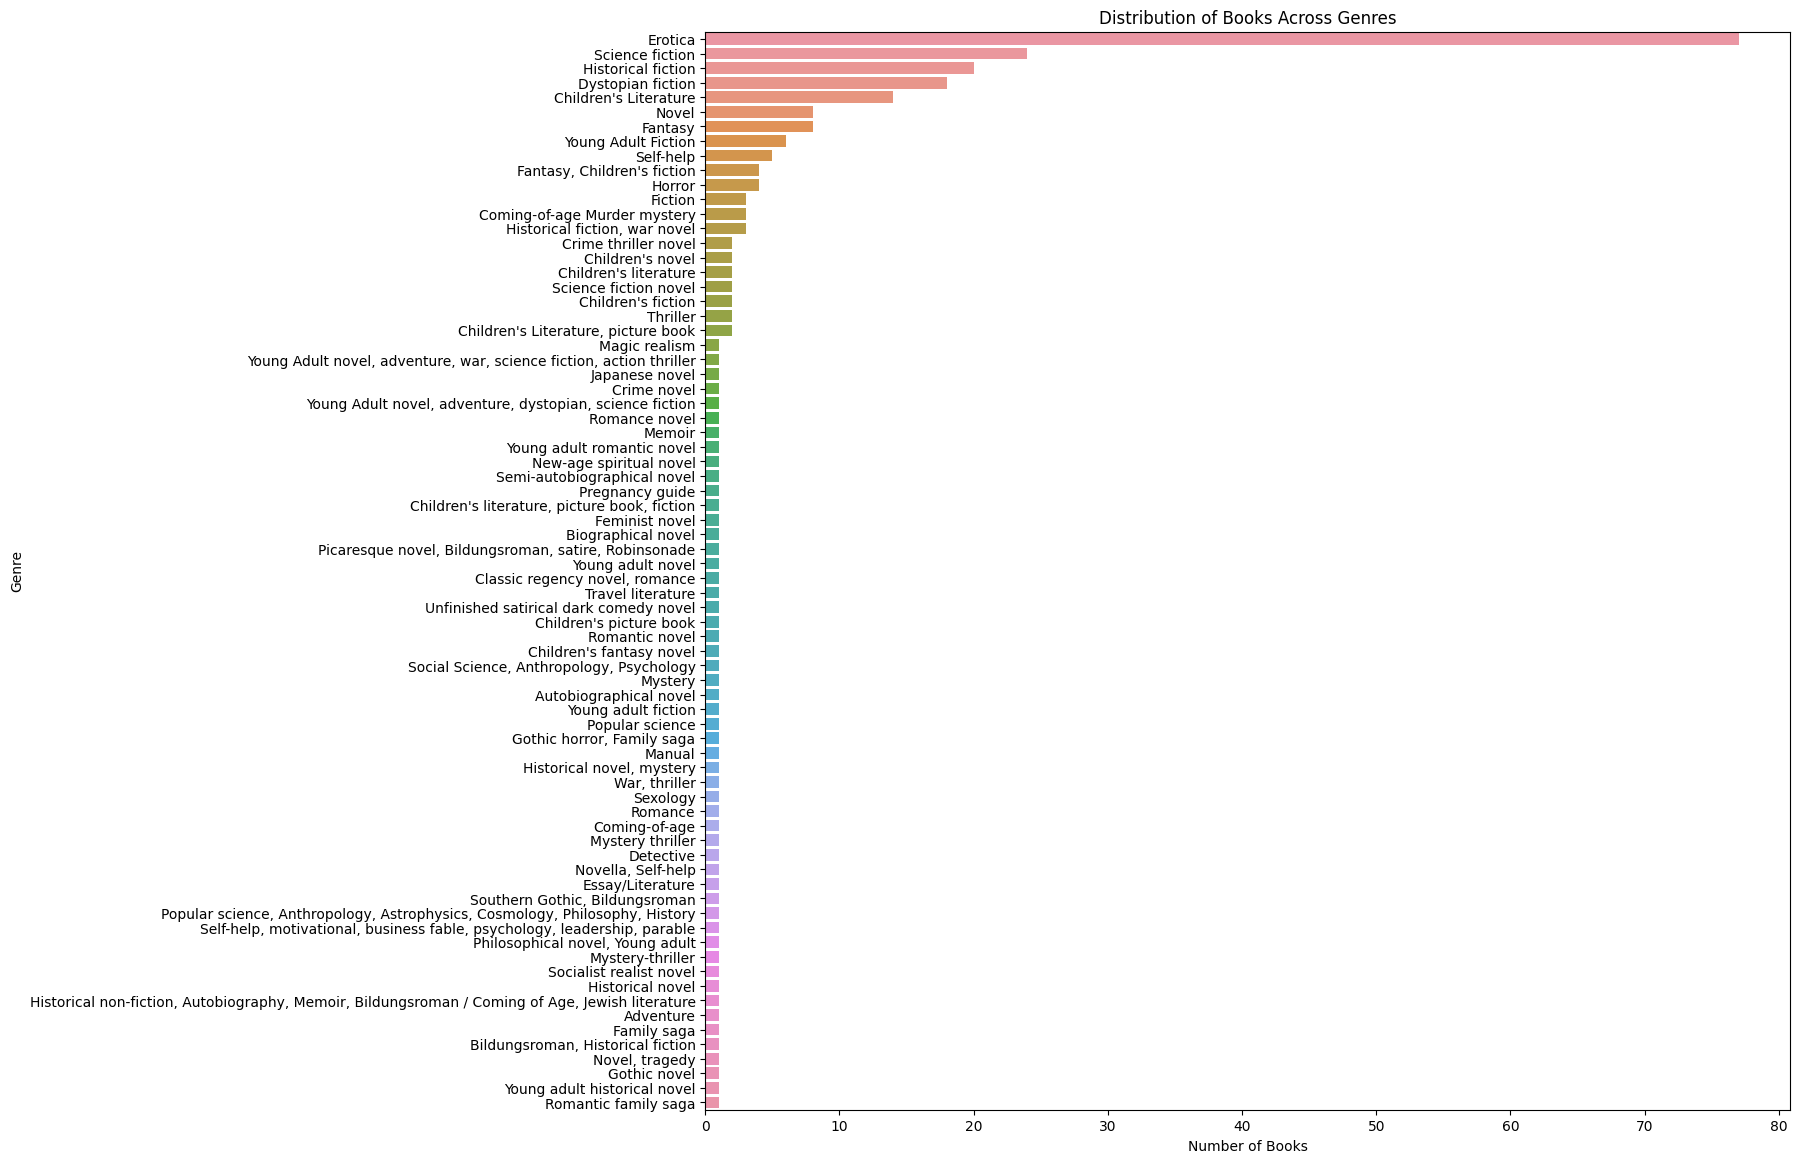

In [7]:
# Create a count plot for genres
plt.figure(figsize=(14, 14))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribution of Books Across Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()


**What are the top 10 most sold books?**

In [8]:
# Sort by sales and select top 10
top_10_books = df.sort_values(by='Approximate sales', ascending=False).head(10)

# Plot the top 10 most sold books
fig = px.bar(top_10_books, x='Book', y='Approximate sales', title='Top 10 Most Sold Books')
fig.show()

**When were most of the books first published?**

In [9]:
# Extract the year from the 'First published' column
df['First published'] = pd.to_datetime(df['First published'], errors='coerce')
df['Year'] = df['First published'].dt.year

# Plot the distribution of books by the year of first publication
fig = px.histogram(df, x='Year', title='Distribution of Books by Year of First Publication',
                   labels={'Year': 'First Published Year', 'count': 'Number of Books'})
fig.show()


**Who are the top 10 authors with the highest total sales?**

In [10]:
# Group by author and sum the sales
top_authors = df.groupby('Author(s)')['Approximate sales'].sum().reset_index().sort_values(by='Approximate sales', ascending=False).head(10)

# Plot the top 10 authors with the highest total sales
fig = px.bar(top_authors, x='Author(s)', y='Approximate sales', title='Top 10 Authors with Highest Total Sales')
fig.show()


**How does the distribution of sales vary over the years?**

In [11]:
# Assuming df is your DataFrame with columns 'Year' and 'Approximate sales'
fig = px.scatter(df, x='Year', y='Approximate sales', title='Distribution of Sales Over the Years',
                 labels={'Year': 'Publication Year', 'Approximate sales': 'Sales'})
fig.show()

**What is the distribution of sales for each genre?**

In [12]:
# Plot a box plot to show the distribution of sales for each genre
fig = px.box(df, x='Genre', y='Approximate sales', title='Distribution of Sales for Each Genre',
             labels={'Genre': 'Book Genre', 'Approximate sales': 'Sales'}, height=1000)
fig.show()


**How do the sales vary for books in different languages?**

In [13]:
# Plot a bar chart to show the sales variation for books in different languages
fig = px.bar(df, x='Original language', y='Approximate sales', title='Sales Variation for Books in Different Languages',
             labels={'Original language': 'Language', 'Approximate sales': 'Sales'})
fig.show()


**What is the average sales for books in each genre?**

In [14]:
# Remove non-numeric characters from the 'Approximate sales' column
df['Approximate sales'] = df['Approximate sales'].replace('[^\d.]', '', regex=True)

# Convert the 'Approximate sales' column to numeric
df['Approximate sales'] = pd.to_numeric(df['Approximate sales'], errors='coerce')

# Calculate the average sales for books in each genre
average_sales_genre = df.groupby('Genre')['Approximate sales'].mean().reset_index()

# Plot the average sales for each genre
fig = px.bar(average_sales_genre, x='Genre', y='Approximate sales', title='Average Sales for Books in Each Genre',
             labels={'Genre': 'Book Genre', 'Approximate sales': 'Average Sales'}, height=1000)
fig.show()


**How has the sales performance changed over time for specific genres?**

In [15]:
import plotly.express as px

# Convert the 'Year' column to string
df['Year'] = df['Year'].astype(str)

# Scatter plot to show the sales performance over time for specific genres
fig = px.scatter(df, x='Year', y='Approximate sales', color='Genre',
                 title='Sales Performance Over Time for Specific Genres',
                 labels={'Year': 'Publication Year', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500)
fig.update_traces(mode='markers', marker=dict(size=8))
fig.show()


**What are the top 10 books with the highest sales in a specific genre?**

In [16]:
# Choose a specific genre (e.g., 'Fiction') and find the top 10 books with the highest sales
genre_top_10_books = df[df['Genre'] == 'Fiction'].sort_values(by='Approximate sales', ascending=False).head(10)

# Plot the top 10 books with the highest sales in the specified genre
fig = px.bar(genre_top_10_books, x='Book', y='Approximate sales',
             title='Top 10 Books with Highest Sales in Fiction Genre')
fig.show()


**Is there a relationship between the number of authors and sales?**

In [17]:
# Scatter plot to visualize the relationship between the number of authors and sales
df['Number of Authors'] = df['Author(s)'].apply(lambda x: len(x.split(',')))
fig = px.scatter(df, x='Number of Authors', y='Approximate sales', trendline='ols',
                 title='Relationship Between Number of Authors and Sales',
                 labels={'Number of Authors': 'Number of Authors', 'Approximate sales': 'Sales'})
fig.show()


**How does the sales of books correlate with the year of first publication across genres?**

In [18]:
# Scatter plot to visualize the correlation between the year of first publication and sales across genres
fig = px.scatter(df, x='Year', y='Approximate sales', color='Genre',
                 title='Correlation between Year of First Publication and Sales Across Genres',
                 labels={'Year': 'First Published Year', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500)
fig.show()


**Is there a relationship between the number of authors and sales for different genres?**

In [19]:
# Scatter plot to visualize the relationship between the number of authors and sales for different genres
fig = px.scatter(df, x='Number of Authors', y='Approximate sales', color='Genre',
                 title='Relationship Between Number of Authors and Sales Across Genres',
                 labels={'Number of Authors': 'Number of Authors', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500)
fig.show()


**How are sales distributed by language for the top 10 most sold books?**

In [20]:
# Sort by sales and select top 10
top_10_books = df.sort_values(by='Approximate sales', ascending=False).head(10)

# Scatter plot to show the distribution of sales by language for the top 10 most sold books
fig = px.scatter(top_10_books, x='Original language', y='Approximate sales',
                 title='Sales Distribution by Language for Top 10 Most Sold Books',
                 labels={'Original language': 'Language', 'Approximate sales': 'Sales'}, width=800)
fig.show()


**What is the correlation between the year of first publication and sales for books in different languages?**

In [21]:
# Scatter plot to visualize the correlation between the year of first publication and sales for each language
fig = px.scatter(df, x='Year', y='Approximate sales', color='Original language',
                 title='Correlation between Year of First Publication and Sales for Different Languages',
                 labels={'Year': 'First Published Year', 'Approximate sales': 'Sales', 'Original language': 'Language'})
fig.show()


**Are there any trends in sales over time for books written by a single author vs. multiple authors?**

In [22]:
# Create a categorical variable for single or multiple authors
df['Author Type'] = df['Number of Authors'].apply(lambda x: 'Single Author' if x == 1 else 'Multiple Authors')

# Scatter plot to compare the trends in sales over time for single and multiple authors
fig = px.scatter(df, x='Year', y='Approximate sales', color='Author Type',
                 title='Trends in Sales Over Time for Single and Multiple Authors',
                 labels={'Year': 'First Published Year', 'Approximate sales': 'Sales', 'Author Type': 'Author Type'})
fig.show()


**How do sales vary for books in different genres based on the original language?**

In [23]:
# Scatter plot to show the variation in sales for books in different genres based on the original language
fig = px.scatter(df, x='Genre', y='Approximate sales', color='Original language',
                 title='Sales Variation for Books in Different Genres Based on Original Language',
                 labels={'Genre': 'Book Genre', 'Approximate sales': 'Sales', 'Original language': 'Language'}, height=1000)
fig.show()


**What is the relationship between the year of first publication and sales for books with various genres?**

In [24]:
# Scatter plot to visualize the relationship between the year of first publication and sales for each genre
fig = px.scatter(df, x='Year', y='Approximate sales', color='Genre',
                 title='Relationship between Year of First Publication and Sales for Various Genres',
                 labels={'Year': 'First Published Year', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500)
fig.show()


**What is the proportion of books in each genre using a sunburst chart?**

In [25]:
# Sunburst chart to show the proportion of books in each genre
fig = px.sunburst(df, path=['Genre'], title='Proportion of Books in Each Genre')
fig.show()


**How does the sales distribution vary for the top 10 authors using a bar chart?**

In [26]:
# Group by author and sum the sales, then select top 10 authors
top_authors = df.groupby('Author(s)')['Approximate sales'].sum().reset_index().sort_values(by='Approximate sales', ascending=False).head(10)

# Bar chart to visualize the sales distribution for the top 10 authors
fig = px.bar(top_authors, x='Author(s)', y='Approximate sales', title='Sales Distribution for Top 10 Authors',
             labels={'Author(s)': 'Author', 'Approximate sales': 'Sales'})
fig.show()


**Can we visualize the relationship between sales and the year of first publication with a 3D scatter plot?**

In [27]:
# 3D Scatter plot to visualize the relationship between sales, year of first publication, and genre
fig = px.scatter_3d(df, x='Year', y='Approximate sales', z='Genre', color='Genre',
                    title='3D Scatter Plot: Sales vs Year of First Publication Across Genres',
                    labels={'Year': 'First Published Year', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500, height=800)
fig.show()


**How do sales vary for books in different genres over the years using a stacked area chart?**

In [28]:
# Stacked area chart to show the variation in sales for books in different genres over the years
fig = px.area(df, x='Year', y='Approximate sales', color='Genre',
              title='Stacked Area Chart: Sales Variation for Books in Different Genres Over the Years',
              labels={'Year': 'Publication Year', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500)
fig.show()


**What is the distribution of sales for books in each genre using a radar chart?**

In [29]:
# Radar chart to show the distribution of sales for each genre
fig = px.line_polar(df, r='Approximate sales', theta='Genre', line_close=True,
                    title='Radar Chart: Sales Distribution for Each Genre')
fig.show()


**How does the sales performance vary for the top 10 authors with a scatter plot and color-coded by genre?How does the sales of books in different languages compare using a grouped bar chart?**

In [30]:
# Grouped bar chart to compare the sales of books in different languages
fig = px.bar(df, x='Original language', y='Approximate sales', color='Genre',
             title='Grouped Bar Chart: Sales Comparison for Books in Different Languages',
             labels={'Original language': 'Language', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width=1500)
fig.show()


**What is the relationship between the year of first publication and sales for the top 10 most sold books using a bubble chart?**

In [31]:
# Sort by sales and select top 10
top_10_books = df.sort_values(by='Approximate sales', ascending=False).head(10)

# Bubble chart to visualize the relationship between year of first publication, sales, and genre for the top 10 books
fig = px.scatter(top_10_books, x='Year', y='Approximate sales', size='Approximate sales', color='Genre',
                 title='Bubble Chart: Relationship between Year of First Publication, Sales, and Genre for Top 10 Books',
                 labels={'Year': 'First Published Year', 'Approximate sales': 'Sales', 'Genre': 'Book Genre'}, width =1200)
fig.show()
